# NLP Group Project 
## Heather's Notebook

In [1]:
import pandas as pd
import numpy as np
import unicodedata
import re
import nltk

# imports for visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm # for colormap tools
import seaborn as sns
from wordcloud import WordCloud

# import modules 
import prepare as p
import acquire as a
import explore as ex
import model as m

# imports for NLP extraction
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# imports for modeling
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, recall_score, plot_confusion_matrix


plt.rc('figure', figsize=(13, 7))
plt.rc('font', size=16)
plt.style.use('seaborn-darkgrid')

In [2]:
df = pd.read_json('data2.json')

In [3]:
df.head()

,repo,language,readme_contents
0,codingXiaxw/CustomerManagement,Java,## JavaWeb项目之客户管理系统 \n\n## 项目介绍\n详细讲解请点击这里前往我的...
1,DanWahlin/CustomerManager,JavaScript,Customer Manager with AngularJS (with custom r...
2,Tophold/FinancialCustomerView,Java,## FinancialCustomerView\n* 本项目会对金融交易软件中存在的各种V...
3,DanWahlin/CustomerManagerStandard,JavaScript,Customer Manager with AngularJS\r\n===========...
4,spring-cloud-samples/customers-stores,Java,# REST based micro-services sample\n\n- Three ...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             194 non-null    object
 1   language         187 non-null    object
 2   readme_contents  194 non-null    object
dtypes: object(3)
memory usage: 4.7+ KB


In [5]:
df.language.value_counts()

PHP                 41
Jupyter Notebook    32
JavaScript          25
Java                23
Python              20
C#                  12
R                    4
TypeScript           4
HTML                 4
Go                   3
Ruby                 3
Vue                  3
PowerShell           2
HCL                  2
CSS                  2
Dart                 2
Shell                1
Objective-C          1
Swift                1
Scala                1
ABAP                 1
Name: language, dtype: int64

In [6]:
df = p.drop_unneeded_data(df)

<AxesSubplot:>

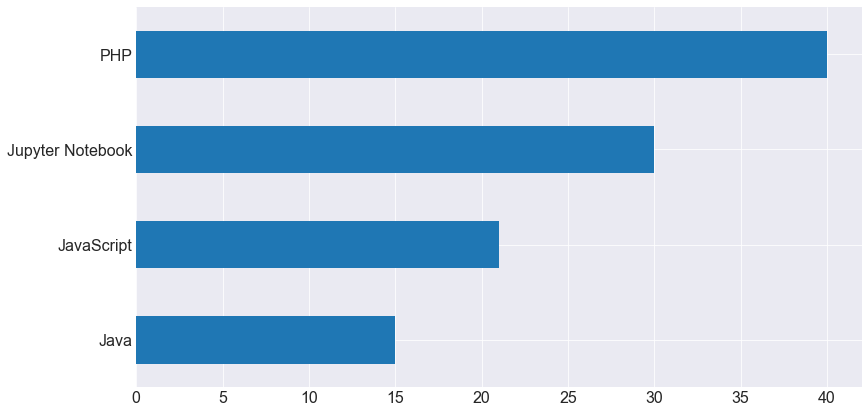

In [7]:
df.language.value_counts().sort_values(ascending = True).plot.barh()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             106 non-null    object
 1   language         106 non-null    object
 2   readme_contents  106 non-null    object
dtypes: object(3)
memory usage: 2.6+ KB


### Explore Data
- Will explore lemmatized data
- try to find common words 
- 4 different categories, JavaScript, Java, Jupyter Notebook, PHP
    - PHP is a general-purpose scripting language geared towards web development
    - Java - programming language, object oriented, standalone language
    - JavaScript - Scripting language needs to be integrated into an HTML program for execution.
    - Jupyter notebook has raw code that is a JSON but is an interface for other programming languages

In [9]:
df = pd.read_json('data2.json')
df = p.drop_unneeded_data(df)


df = p.prepare_nlp_data(df, content = 'readme_contents', extra_words=['customer', 'customers', '1', '2'])

train, validate, test = p.split_data(df)

train---> (58, 6)
validate---> (26, 6)
test---> (22, 6)


In [10]:
train.head()

,repo,language,readme_contents,clean,stemmed,lemmatized
23,Asutosh11/CustomerSupportChat,Java,[![](https://jitpack.io/v/Asutosh11/CustomerSu...,httpsjitpackiovasutosh11customersupportchatsvg...,httpsjitpackiovasutosh11customersupportchatsvg...,httpsjitpackiovasutosh11customersupportchatsvg...
6,eventuate-tram/eventuate-tram-sagas-examples-c...,Java,\n= Eventuate Tram Sagas Customers and Orders\...,eventuate tram sagas orders application demons...,eventu tram saga order applic demonstr maintai...,eventuate tram saga order application demonstr...
26,erictam96/E-commerceCustomerFYP,Java,# E-commerce Customer Android App FYP\nThis An...,ecommerce android app fyp android app universi...,ecommerc android app fyp android app univers f...,ecommerce android app fyp android app universi...
45,firegento/firegento-customer,PHP,<!-- ALL-CONTRIBUTORS-BADGE:START - Do not rem...,allcontributorsbadgestart remove modify sectio...,allcontributorsbadgestart remov modifi section...,allcontributorsbadgestart remove modify sectio...
70,awslabs/aws-customer-churn-pipeline,Jupyter Notebook,# Customer Churn Pipeline on AWS\n\n*A product...,churn pipeline aws productionfocused end end c...,churn pipelin aw productionfocus end end churn...,churn pipeline aws productionfocused end end c...


In [11]:
all_word_counts = ex.get_word_counts_series(train, 'lemmatized')
java_word_counts = ex.get_word_counts_series(train[train.language == 'Java'], 'lemmatized')
javascript_word_counts = ex.get_word_counts_series(train[train.language == 'JavaScript'], 'lemmatized')
php_word_counts = ex.get_word_counts_series(train[train.language == 'PHP'], 'lemmatized')
jupyter_word_counts = ex.get_word_counts_series(train[train.language == 'Jupyter Notebook'], 'lemmatized')

In [12]:
all_word_counts[all_word_counts.index == 'customer']

Series([], dtype: int64)

- Since we searched for `customer` those will be in every single one 
- That word is removed in the prep function above

In [13]:
word_counts_list = [java_word_counts, javascript_word_counts, php_word_counts, jupyter_word_counts, all_word_counts]
column_names = list(df.language.unique())
column_names.append('all')

languages = list(df.language.unique())

In [14]:
word_counts = pd.concat(word_counts_list, axis=1).fillna(0).astype(int)
word_counts.columns = column_names
word_counts.head()

,JavaScript,Java,Jupyter Notebook,PHP,all
service,126,9,4,20,159
order,116,4,29,5,154
saga,58,0,0,0,58
using,47,23,25,55,150
application,36,23,3,13,75


In [15]:
blues = [ '#f1faee', '#a8dadc', '#457b9d', '#1d3557', '#e63946']

<Figure size 1152x648 with 0 Axes>

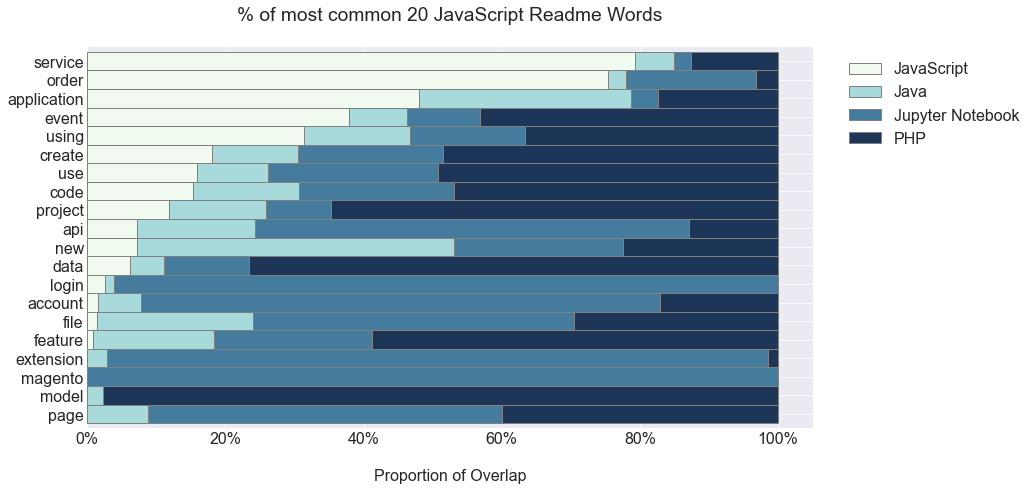

<Figure size 1152x648 with 0 Axes>

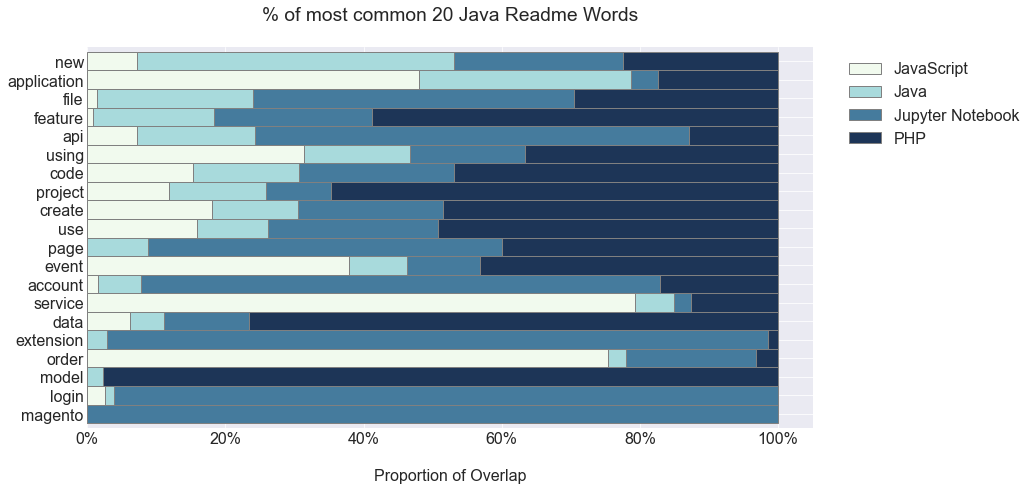

<Figure size 1152x648 with 0 Axes>

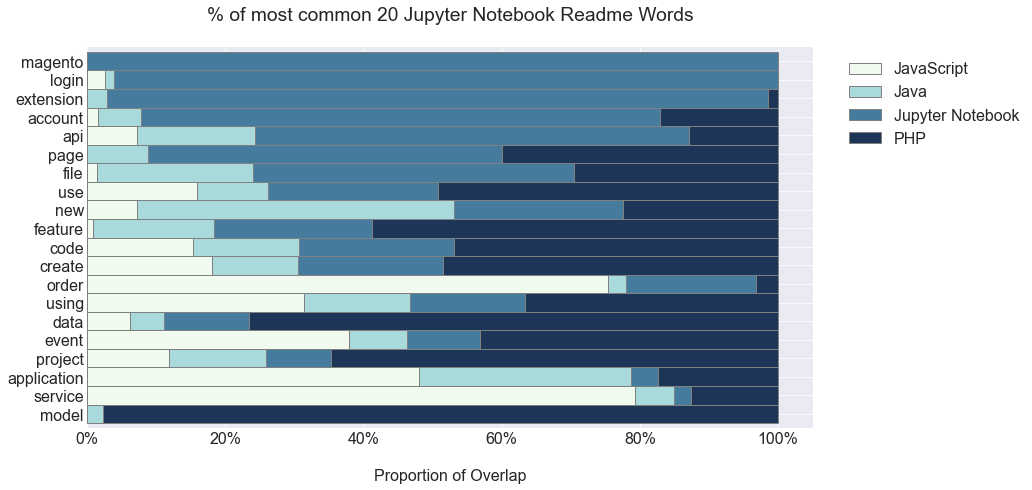

<Figure size 1152x648 with 0 Axes>

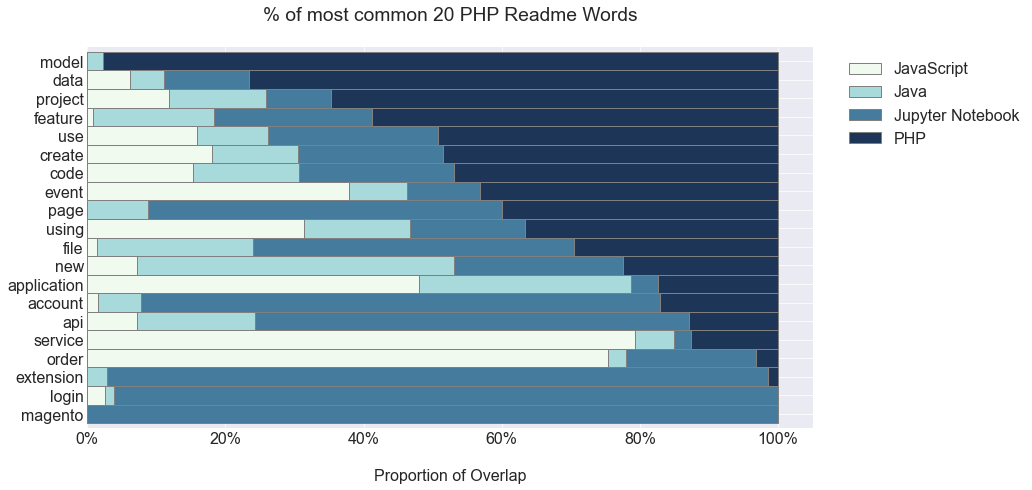

In [16]:
for language in languages:
    ex.plot_overlap_stacked_bar(word_counts, language, colors=blues)

### Takeaways
- 'magento' is only in jupyter notebooks
- 'extension' mostly in jupyter notebooks but only found elsewhere in Java readmes
- 'model' is very common for php, close to 95% 
- 'notebook' is only in PHP. Weird that it's not in jupyter readmes at all 

#### Words to remove
- 1
- 2

### Next Steps
- Create Bigrams
- Create Trigrams

In [17]:
# create words lists
words = ' '.join(train['lemmatized'])
all_words = words.split()

words = ' '.join(train[train.language == 'JavaScript']['lemmatized'])
javascript_words = words.split()

words = ' '.join(train[train.language == 'Java']['lemmatized'])
java_words = words.split()

words = ' '.join(train[train.language == 'PHP']['lemmatized'])
php_words = words.split()

words = ' '.join(train[train.language == 'Jupyter Notebook']['lemmatized'])
jupyter_words = words.split()


all_the_words_list = [javascript_words, java_words, jupyter_words, php_words, all_words]

In [18]:
column_names

['JavaScript', 'Java', 'Jupyter Notebook', 'PHP', 'all']

-------------------------------------------------JavaScript---------------------------------------------------------


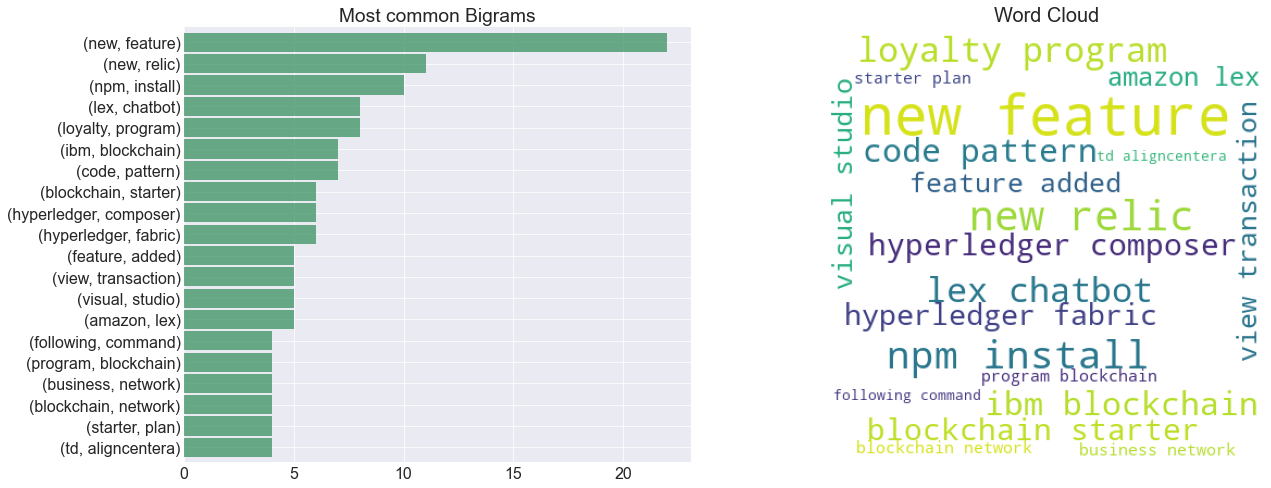

-------------------------------------------------Java---------------------------------------------------------


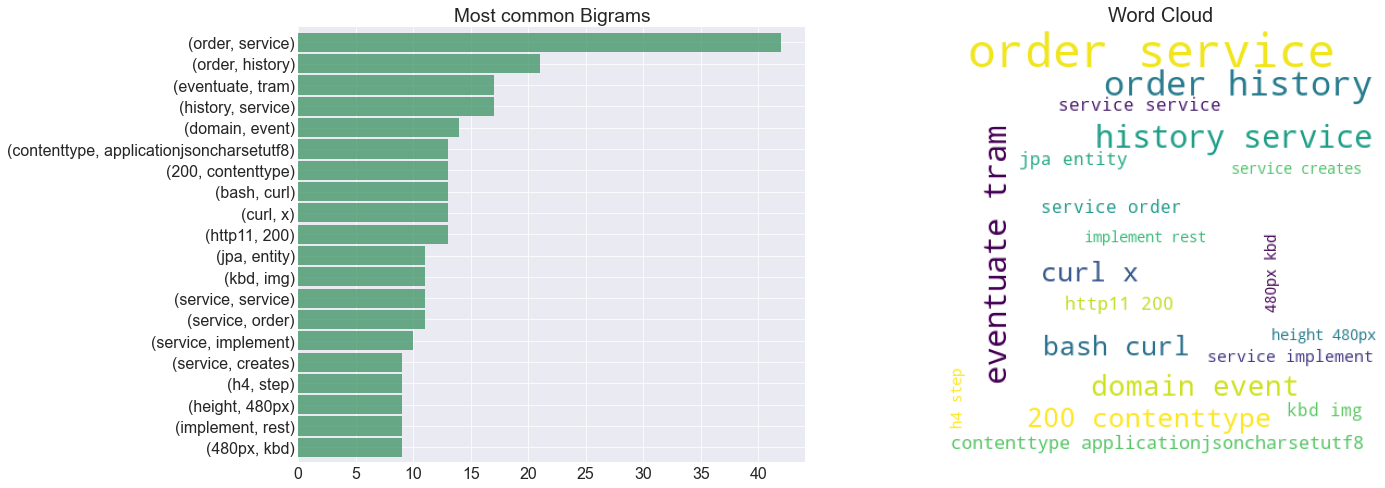

-------------------------------------------------Jupyter Notebook---------------------------------------------------------


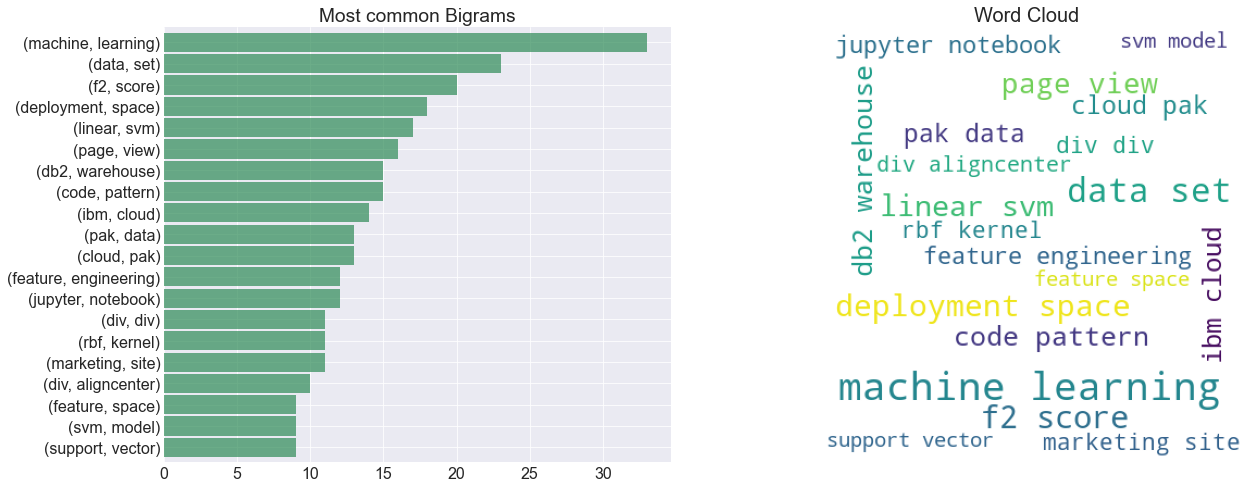

-------------------------------------------------PHP---------------------------------------------------------


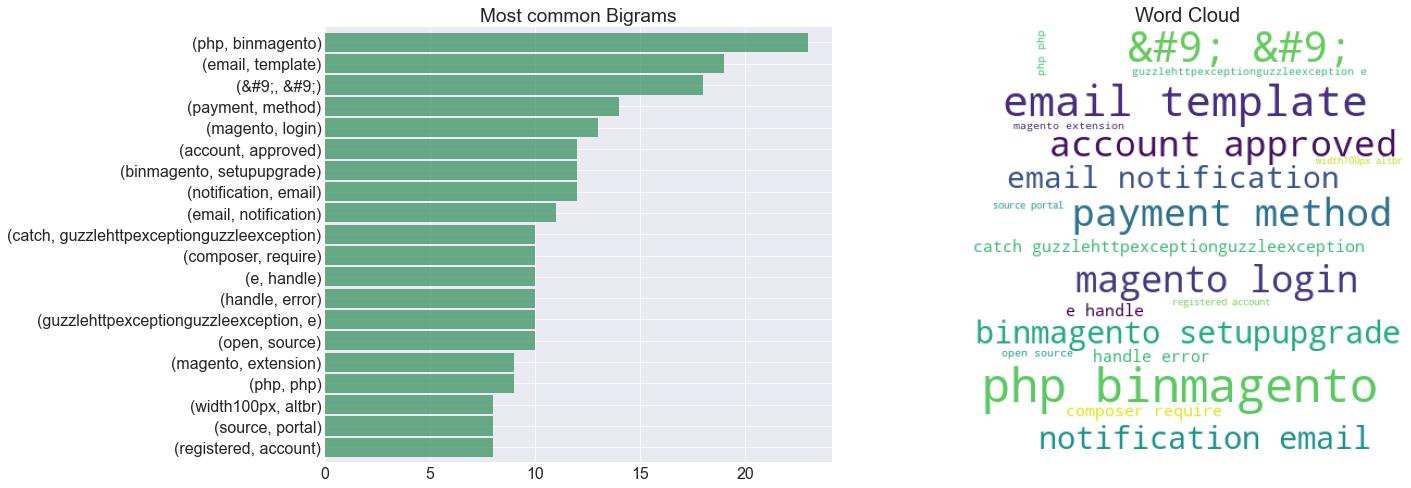

-------------------------------------------------all---------------------------------------------------------


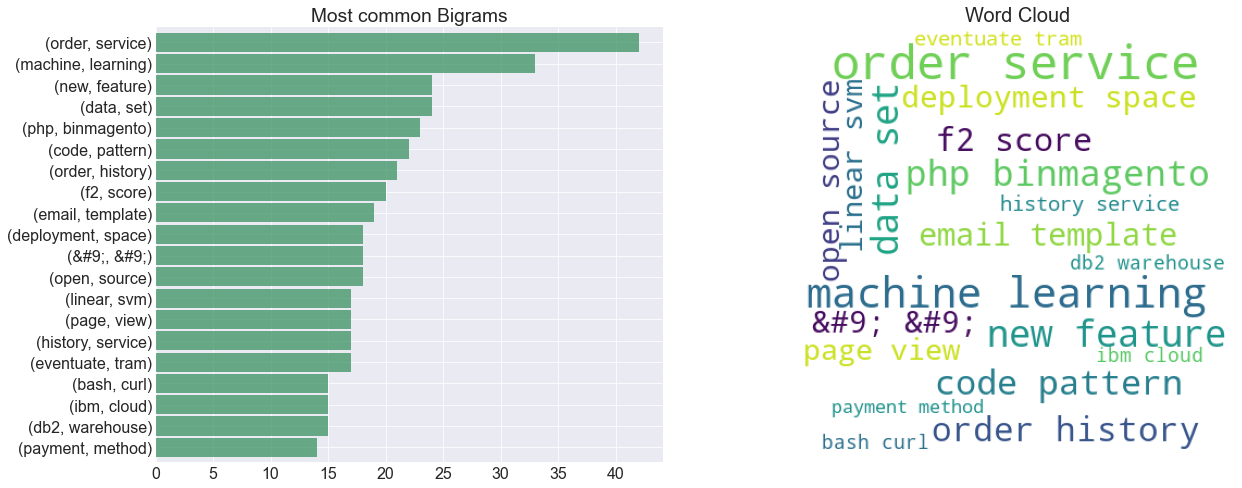

In [19]:
for x, name in zip(all_the_words_list, column_names):
    print(f'-------------------------------------------------{name}---------------------------------------------------------')
    ex.bigram_count_word_cloud(x)

- Guzzle is a PHP HTTP client that makes it easy to send HTTP requests and trivial to integrate with web services.

-------------------------------------------------JavaScript---------------------------------------------------------


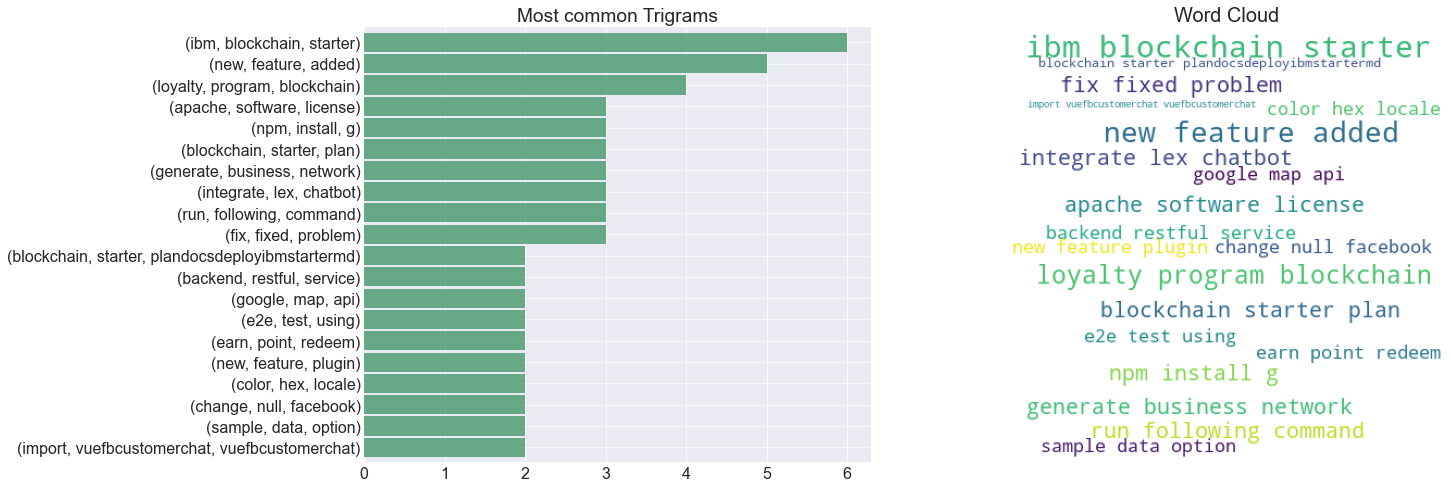

-------------------------------------------------Java---------------------------------------------------------


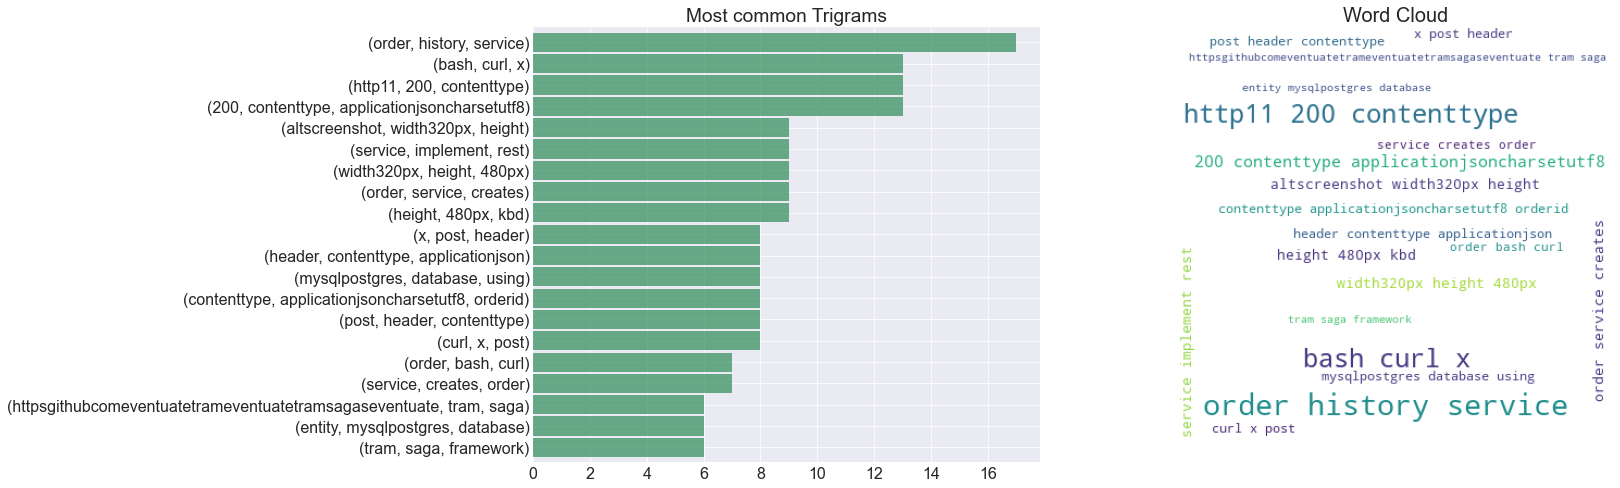

-------------------------------------------------Jupyter Notebook---------------------------------------------------------


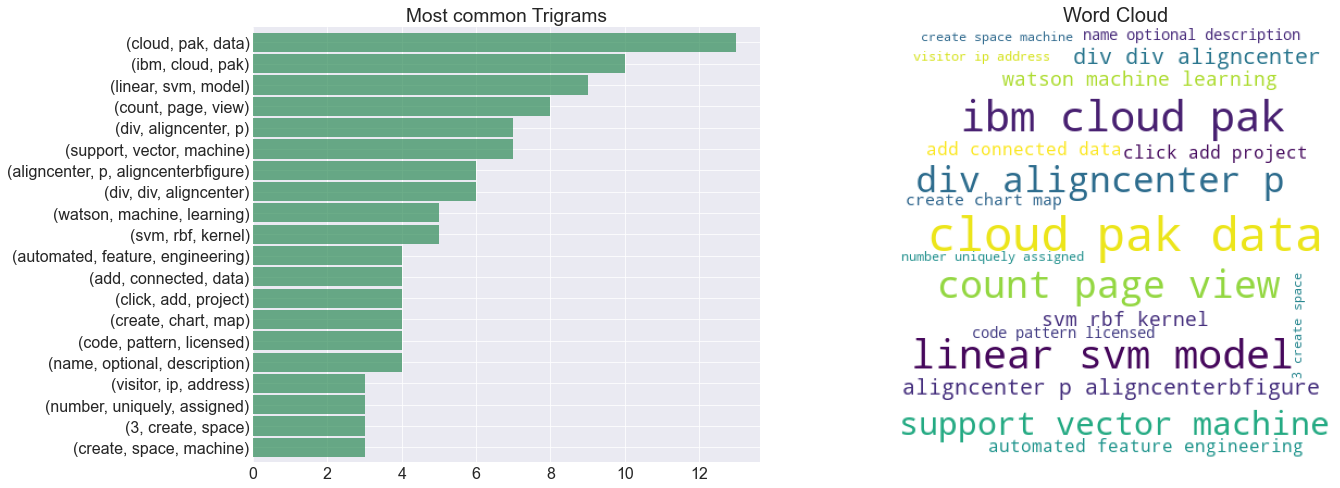

-------------------------------------------------PHP---------------------------------------------------------


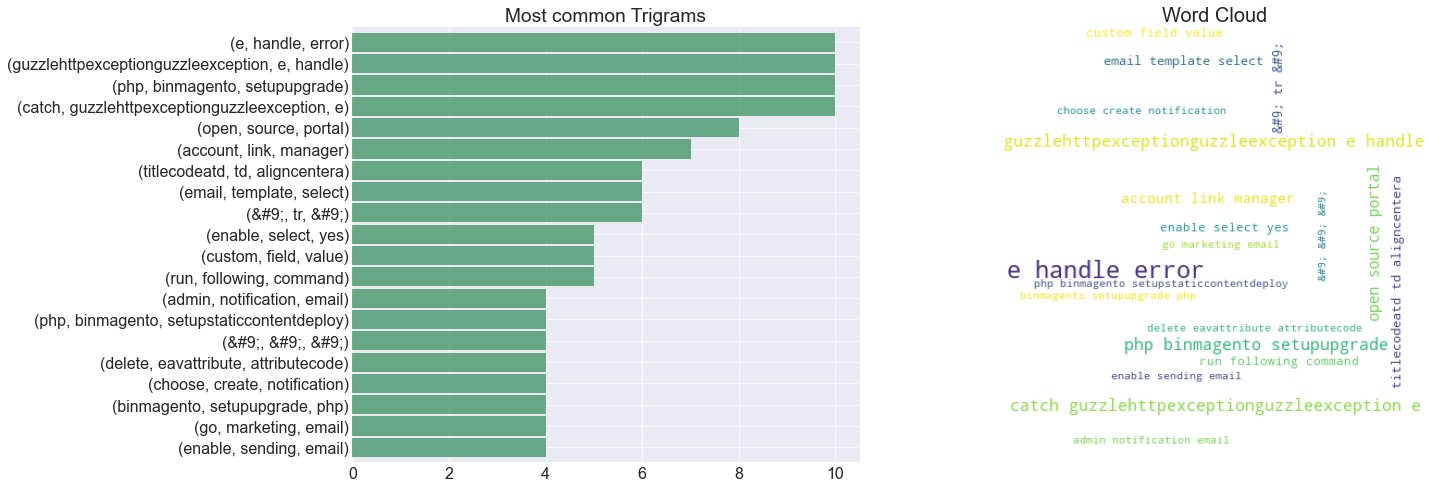

-------------------------------------------------all---------------------------------------------------------


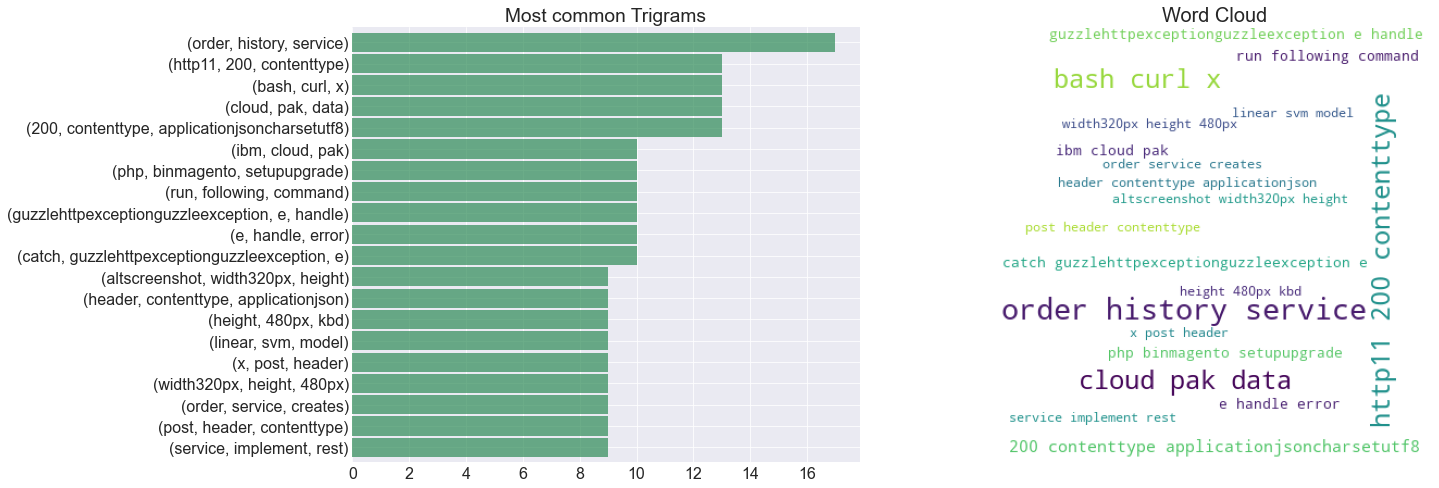

In [20]:
for x, name in zip(all_the_words_list, column_names):
    print(f'-------------------------------------------------{name}---------------------------------------------------------')
    ex.trigram_count_word_cloud(x)

### Takeaways Bigrams and Trigrams
- there are pretty distinct trigrams and bigrams between the different languages
- Could try modeling with both
- Some ngrams like 'watson assistant service' and 'marketing site' might be there because of the domain, we'll have to pay attention to those words during modeling


### Modeling 

In [21]:
tfidf = TfidfVectorizer()
X_data = tfidf.fit_transform(df.lemmatized)
y_data = df.language

# use function from above (need to put in a module)
# split to X/y datasets 

X_train, y_train, X_validate, y_validate, X_test, y_test = m.nlp_X_train_split(X_data, y_data)

In [22]:
score_df = pd.DataFrame(columns = ['model_name', 'train_score', 'validate_score'])

In [23]:
model_list = [MultinomialNB(), LinearSVC(), DecisionTreeClassifier(), RandomForestClassifier()]

model_names = ['Naive_Bayes1', 'SVC1', 'Decision_tree1', 'Random_forest1']

class_names = list(train.language.unique())

In [24]:
for model, name in zip(model_list, model_names):
    score_df = m.test_a_model(X_train, y_train, X_validate, y_validate, model, name, score_df)
    
    m.make_models_and_print_metrics(model, name, X_train, y_train, X_validate, y_validate)

                   ============== Naive_Bayes1 ================           


TypeError: print_metrics() missing 1 required positional argument: 'class_names'